# General settings

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dimdate import create_dimdate, add_holidays
from parse_data import load_and_parse_data

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
EXCEL_FILE     = 'data/on-duty-2024.xlsx'
HOLIDAYS_FILE  = 'data/holidays.csv'
WORK_CODES_FILE = 'data/codes.csv'

GENERATE_DIMDATE = False
START_DATE = '2024-01-01'
END_DATE   = '2024-12-31'

SKIP_ROWS = 12 # Number of rows at the top of each month data

## Functions

In [14]:
def normalize_rows(df:pd.DataFrame) -> pd.DataFrame:
    return df.div(df.sum(axis=1), axis=0) * 100

In [15]:
def reorder_statuses(df):
    reordered_columns = ['Working', 'Training', 'Part time', 'Sick', 'Off']
    return df[reordered_columns]

In [16]:
def only_display_nth_date(ax, dates, N=20) -> None:
    xticks_positions = range(0, len(dates), N)
    xticks_labels = [dates[i].strftime('%Y-%m-%d') for i in xticks_positions]
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels, rotation=45, ha='right')
    ax.set_xlabel('')

# Dimdate generation

In [17]:
holidays = pd.read_csv(HOLIDAYS_FILE)

dimdate = create_dimdate(START_DATE, END_DATE)
dimdate = add_holidays(dimdate, list(holidays['holidays']))
dimdate

KeyError: 'WeekNumber'

# Import excel data

In [9]:
df = load_and_parse_data(EXCEL_FILE, year=2024, skip_sheets=1, skiprows=SKIP_ROWS)
df

c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\Users\studentdot0208\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not support

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code
0,Principal,Atelier A,0339,Nom 031,AM,20240101,NaN
1,Principal,Atelier A,0339,Nom 031,PM,20240101,NaN
2,Principal,Atelier A,7933,Nom 052,AM,20240101,NaN
3,Principal,Atelier A,7933,Nom 052,PM,20240101,NaN
4,Principal,Atelier A,3724,Nom 073,AM,20240101,NaN
...,...,...,...,...,...,...,...
76001,Principal,Atelier K,3235,Nom 093,PM,20241231,NaN
76002,Principal,Atelier K,3199,Nom 096,AM,20241231,NaN
76003,Principal,Atelier K,3199,Nom 096,PM,20241231,NaN
76004,Principal,Atelier K,4162,Nom 097,AM,20241231,NaN


# Work codes

In [10]:
codes = pd.read_csv(WORK_CODES_FILE)
codes

,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot
0,P,Present,Working,1,1,0,0
1,G,On duty,Working,1,1,0,0
2,R1,Time off from overtime,Off,0,0,0,0
3,TD,Travail à Distance,Working,1,0,0,0
4,Mi,Missions,Working,1,0,0,0
5,Mis,Mission Renforts,Working,1,0,0,0
6,Ma,Sick,Sick,0,0,0,1
7,MJ,Sick during the day,Sick,0,0,0,1
8,Jsc,Sick without certificate,Sick,0,0,0,1
9,A,Any absence,Sick,0,0,1,0


## Fixing codes

In [11]:
def replace_code(value):
    if value in ['ViS', 'Vis', 'VIS']:
        return 'VS'
    if value == 'DSA':
        return 'DAS'
    if value == 'MI':
        return 'Mi'
    if value == 'T':
        return 'TD'
    return value
df['Code'] = df['Code'].map(replace_code)

## Merging dims

In [12]:
df = pd.merge(df, codes, how='left', on='Code')
df = pd.merge(df, dimdate, on='DateKey')
df['Date'] = pd.to_datetime(df['Date']).dt.date

## Wrong codes

In [13]:
work_days = df[ (df['IsWeekend'] == 0) & (df['IsHoliday'] == 0) & (~df['Code'].isna()) ]
wrong_code = work_days[ work_days['Status'].isna() ]
wrong_code

,S/Dept,Atelier,ID,Name,AMPM,DateKey,Code,Description,Status,IsWorking,IsOnSite,IsDayCountedOffPot,IsDayCountedOffSickPot,Date,DayOfWeek,DayOfWeekText,DayOfWeekShort,MonthNumber,IsWeekend,IsHoliday,DaysToHoliday
23636,Principal,Atelier I,1105,Nom 053,AM,20240422,Mutation à AMAY,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-22,1,Monday,Mon,4,0,0,5
37932,Principal,Atelier B,5026,Nom 034,AM,20240701,Mutation IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01,1,Monday,Mon,7,0,0,15
42392,Principal,Atelier K,3173,Nom 109,AM,20240722,R1,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-22,1,Monday,Mon,7,0,0,1
44436,c,Atelier I,1777,Nom 019,AM,20240801,MUTATION IN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,4,Thursday,Thu,8,0,0,9
61524,Principal,Atelier K,3886,Nom 015,AM,20241022,VS,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-22,2,Tuesday,Tue,10,0,0,8


# Study

## Display number of worker per workshop

Text(0, 0.5, 'Number of workers')

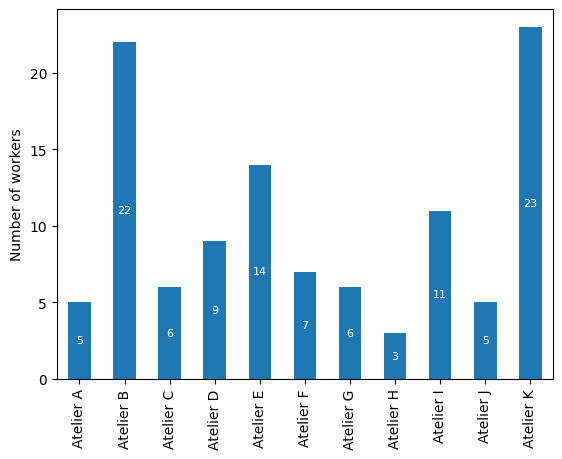

In [14]:
workshops = work_days.drop_duplicates(subset=['Name']).groupby('Atelier').size().astype(int)
ax = workshops.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='white')
plt.xlabel('')
plt.ylabel('Number of workers')

## Average day

In [15]:
workshop = work_days.groupby(['Atelier', 'Status']).size().unstack(fill_value=0)
average_row = workshop.mean(axis=0)
workshop_with_avg = pd.concat([pd.DataFrame([average_row], index=['Average']), workshop])
workshop_with_avg = normalize_rows(workshop_with_avg)
workshop_with_avg = reorder_statuses(workshop_with_avg)
workshop_with_avg

Status,Working,Training,Part time,Sick,Off
Average,67.593724,2.611661,2.014428,8.016320,19.763866
Atelier A,73.577628,5.689489,0.000000,3.760849,16.972035
Atelier B,66.944908,1.638147,4.371870,3.422371,23.622705
Atelier C,67.727675,2.829355,0.000000,2.564103,26.878868
Atelier D,63.938974,8.807212,3.559871,7.836338,15.857605
Atelier E,68.580163,0.883152,0.000000,7.472826,23.063859
Atelier F,72.263825,1.094470,3.168203,4.838710,18.634793
Atelier G,59.557823,0.000000,2.891156,27.006803,10.544218
Atelier H,54.540710,0.000000,0.000000,36.012526,9.446764
Atelier I,64.837649,1.787916,1.315249,11.796136,20.263050


### Average day per workshop

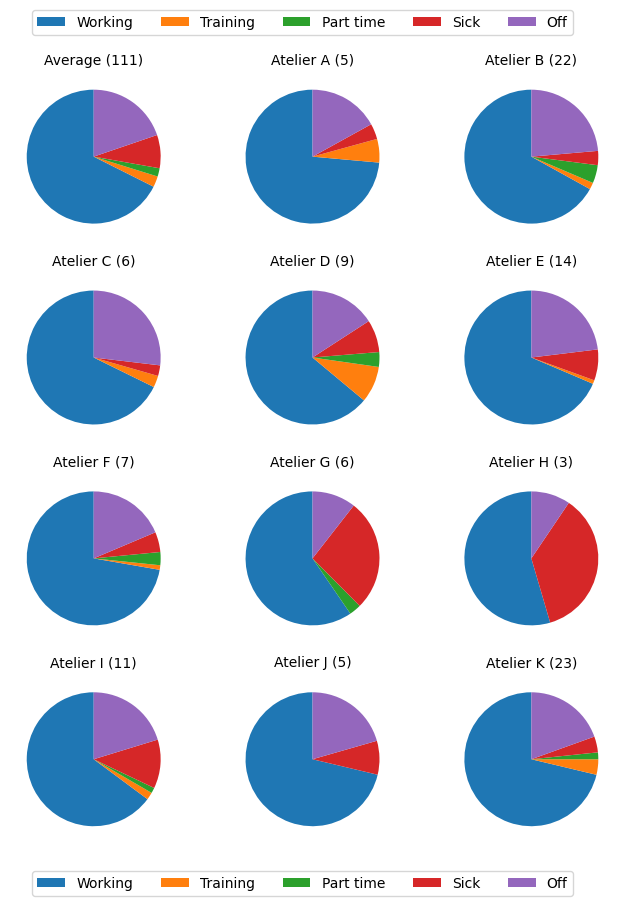

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(8, 10))
axes = axes.flatten()



for i, (row_name, row_data) in enumerate(workshop_with_avg.iterrows()):
    ax = axes[i]
    row_data.rename(index=lambda x: "", inplace=True)  # Temporarily hide column headers
    row_data.plot.pie(ax=ax, startangle=90)
    if i != 0:
        title = f'{row_name} ({workshops[row_name]})'
    else:
        title = f'{row_name} ({workshops.sum()})'
    ax.set_title(title, fontsize=10, loc='center')
    ax.set_ylabel('')
    
fig.legend(
    labels=workshop_with_avg.columns,
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.95),
    ncol=5,
)

fig.legend(
    labels=workshop_with_avg.columns,  # Use the same column headers as legend labels
    loc='lower center', 
    ncol=5,
    bbox_to_anchor=(0.5, 0.05),
)

## By day

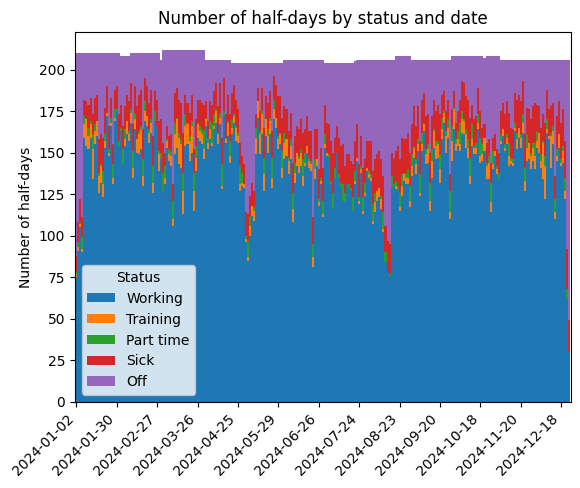

In [17]:
daily_status = work_days.groupby(['Date', 'Status']).size().unstack(fill_value=0)
daily_status = reorder_statuses(daily_status)
daily_status
ax = daily_status.plot(kind='bar', stacked=True, width=1)
only_display_nth_date(ax, daily_status.index)
plt.title('Number of half-days by status and date')
plt.ylabel('Number of half-days');

Text(0.5, 1.0, 'Daily repartition of workers by status')

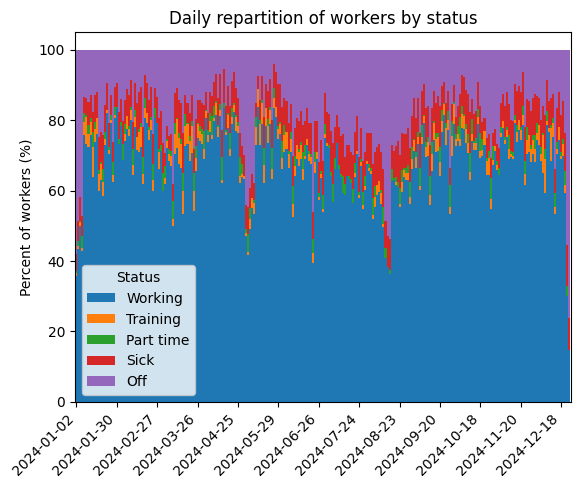

In [18]:
normalized_daily_status = normalize_rows(daily_status)
ax = normalized_daily_status.plot(kind='bar', stacked=True, width=1)
only_display_nth_date(ax, normalized_daily_status.index)
normalized_daily_status
plt.ylabel('Percent of workers (%)')
plt.title('Daily repartition of workers by status')

In [19]:
normalized_daily_status.drop(columns=['Working'], inplace=True)

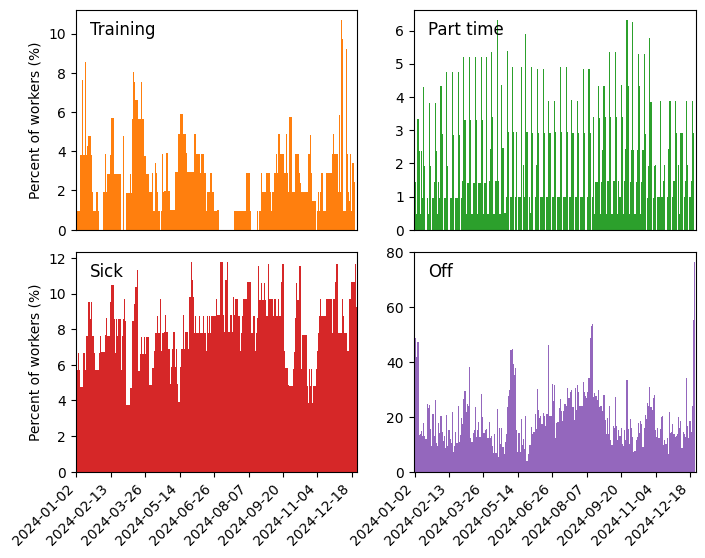

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

colors = plt.cm.tab10.colors[1:]

for i, status in enumerate(normalized_daily_status.columns):
    ax = axes[i]
    ax = normalized_daily_status[status].plot(kind='bar', width=1, color=colors[i], ax=ax)
    
    if i > 1:
        only_display_nth_date(ax, normalized_daily_status.index, N=30)
    else:
        ax.set_xticks([])
        ax.set_xlabel('')
        
    if i % 2 == 0:
        ax.set_ylabel('Percent of workers (%)')
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    
plt.subplots_adjust(hspace=0.1)

Text(0, 0.5, 'Percent of people taking the day off')

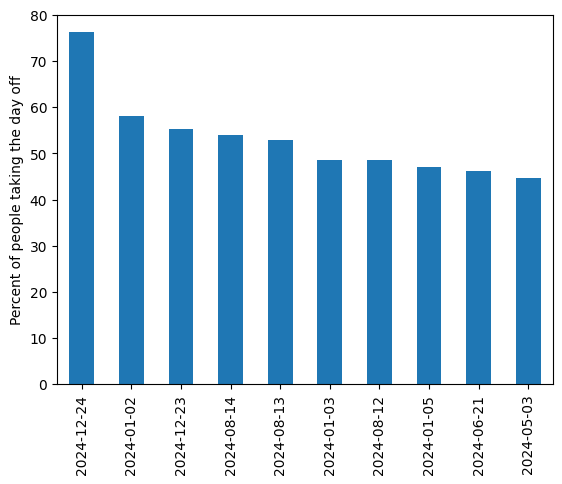

In [21]:
top_off = normalized_daily_status['Off'].sort_values(ascending=False).head(10)
top_off.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Percent of people taking the day off')

Text(0, 0.5, 'Percent of people being sick')

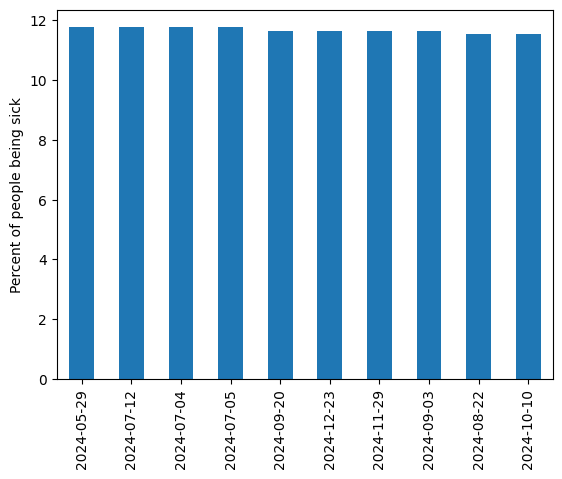

In [22]:
top_sick = normalized_daily_status['Sick'].sort_values(ascending=False).head(10)
top_sick.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Percent of people being sick')

Text(0, 0.5, 'Number of half-days')

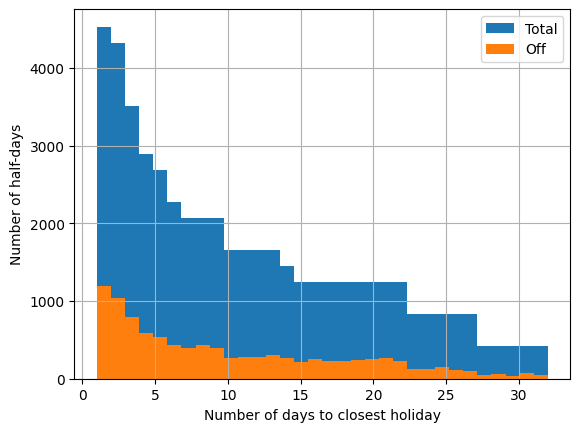

In [23]:
work_days['DaysToHoliday'].hist(bins=32)
work_days[ work_days['Status'] == 'Off' ]['DaysToHoliday'].hist(bins=32)
plt.legend(['Total', 'Off'])
plt.xlabel('Number of days to closest holiday')
plt.ylabel('Number of half-days')

Text(0, 0.5, 'Percent of workers taking time off (%)')

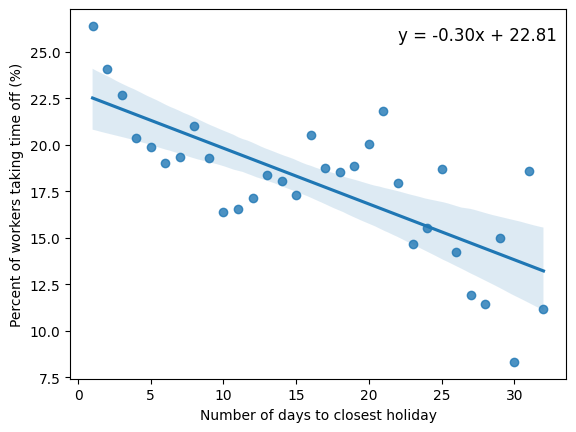

In [24]:
days_off = work_days[ work_days['Status'] == 'Off' ]
percent_off = days_off['DaysToHoliday'].value_counts() / work_days['DaysToHoliday'].value_counts() * 100

x = percent_off.index
y = percent_off.values
slope, intercept = np.polyfit(x, y, 1)

formula = f"y = {slope:.2f}x + {intercept:.2f}"

sns.regplot(x=x, y=y)
plt.text(max(x)-10, max(y), formula, fontsize=12, ha='left', va='top')
plt.xlabel('Number of days to closest holiday')
plt.ylabel('Percent of workers taking time off (%)')

## By month

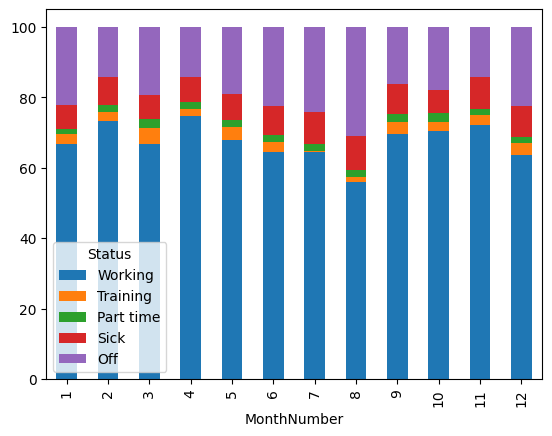

In [25]:
monthly_status = work_days.groupby(['MonthNumber', 'Status']).size().unstack(fill_value=0)
monthly_status = reorder_statuses(monthly_status)
normalized_monthly_status = normalize_rows(monthly_status)
ax = normalized_monthly_status.plot(kind='bar', stacked=True)
# normalized_monthly_status

In [26]:
normalized_monthly_status.drop(columns=['Working'], inplace=True)

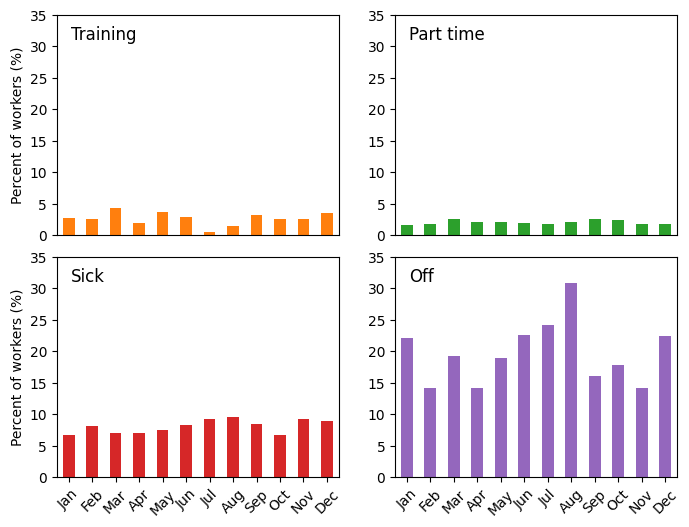

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

months_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = plt.cm.tab10.colors[1:]

for i, status in enumerate(normalized_monthly_status.columns):
    ax = axes[i]
    ax = normalized_monthly_status[status].plot(kind='bar', color=colors[i], ax=ax)
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    ax.set_xlabel('')
    ax.set_ylim(0, 35)
    
    # X labels
    if i > 1:
        ax.set_xticks(ticks=range(len(months_short)), labels=months_short, rotation=45)
    else:
        ax.set_xticks([])
        
    # Y labels
    if i % 2 == 0:
        ax.set_ylabel('Percent of workers (%)')
    
plt.subplots_adjust(hspace=0.1)

## By week day

Status,Training,Part time,Sick,Off
DayOfWeek,,,,
1,2.343027,2.949337,7.357928,18.425650
2,2.675834,0.222986,7.776642,18.052588
3,2.742372,1.139436,8.053302,20.393975
4,2.769564,1.320718,8.417110,17.129903
5,2.505648,4.713494,8.482235,25.066749


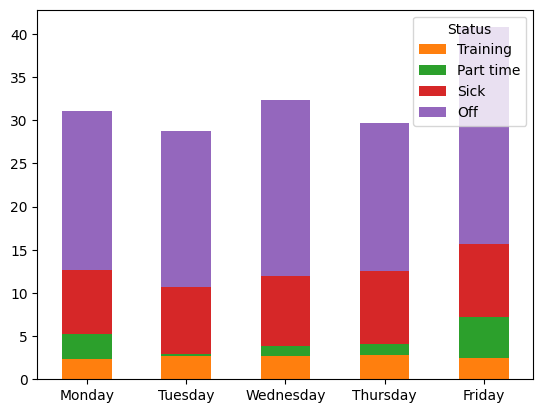

In [28]:
weekly_status = work_days.groupby(['DayOfWeek', 'Status']).size().unstack(fill_value=0)
normalized_weekly_status = normalize_rows(weekly_status)
normalized_weekly_status = reorder_statuses(normalized_weekly_status)
normalized_weekly_status.drop(columns=['Working'], inplace=True)

normalized_weekly_status.plot(kind='bar', stacked=True, color=colors)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(
    ticks = range(len(days_of_week)),
    labels = days_of_week,
    rotation = 0,
)
plt.xlabel('')
normalized_weekly_status

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

days_of_week_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

for i, status in enumerate(normalized_weekly_status.columns):
    ax = axes[i]
    normalized_weekly_status[status].plot(kind='bar', color=colors[i], ax=ax)
    ax.set_xlabel('')
    ax.set_ylim(0, 30)
    ax.text(0.05, 0.95, status, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='black')
    ax.set_xticks(
        ticks = range(len(days_of_week_short)),
        labels = days_of_week_short,
        rotation = 0,
    )

NameError: name 'plt' is not defined

## Blood donations

In [30]:
blood_donation_count = work_days[ work_days['Code'] == 'DS' ].groupby('Name')['Date'].nunique()
blood_donation_days_saved = work_days[ work_days['Code'] == 'DS' ].groupby('Name').size()

## Display holidays

<Axes: xlabel='Date'>

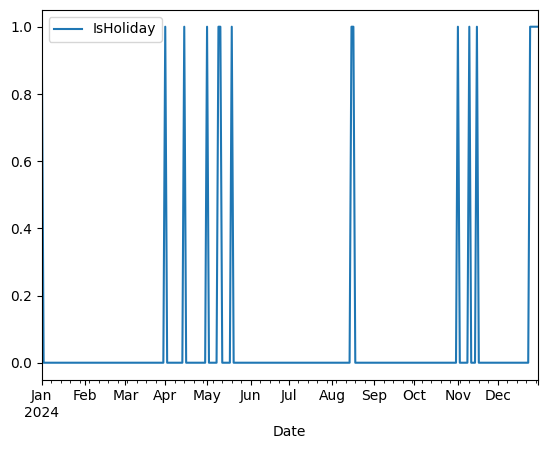

In [31]:
dimdate[dimdate['IsWeekend'] == 0].plot(x='Date', y='IsHoliday')

## Display number of days to holidays

<Axes: >

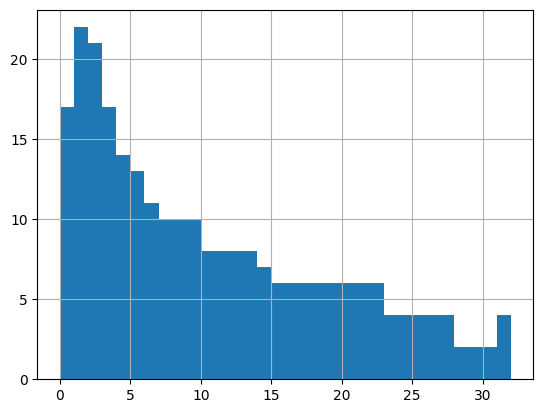

In [32]:
dimdate.loc[dimdate['IsWeekend'] == 0, 'DaysToHoliday'].hist(bins=32)

<Axes: xlabel='Date'>

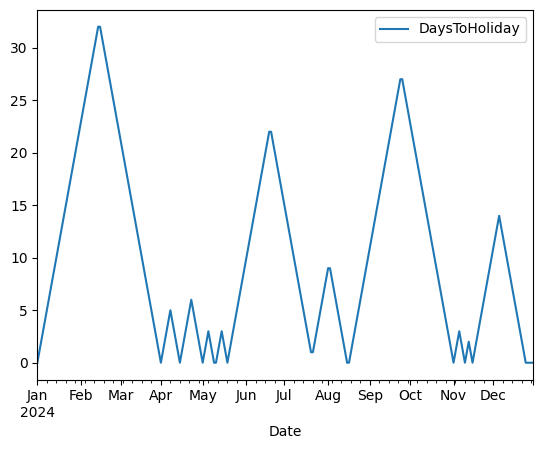

In [33]:
no_weekend = dimdate[ (dimdate['IsWeekend'] == 0) ]
no_weekend.plot(x='Date', y='DaysToHoliday')

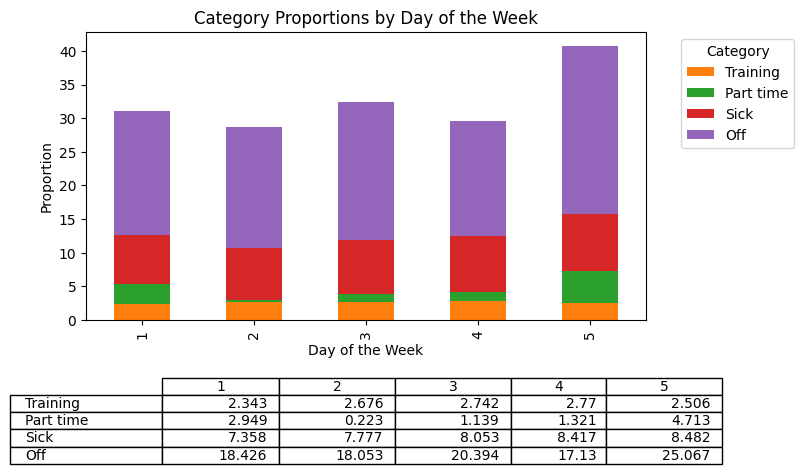

In [34]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart
normalized_weekly_status.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customize the chart
ax.set_title('Category Proportions by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Proportion')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a table
table_data = normalized_weekly_status.T.round(3).values  # Transpose and round the data
table_columns = normalized_weekly_status.index          # Get day labels
table_rows = normalized_weekly_status.columns           # Get category labels
table = plt.table(cellText=table_data, rowLabels=table_rows, colLabels=table_columns, 
                  loc='bottom', bbox=[0, -0.5, 1, 0.3])  # Position the table

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_columns))))

# Adjust layout to fit everything
plt.subplots_adjust(left=0.2, bottom=0.4)

# Show plot
plt.show()